In [67]:
from sklearn.datasets import make_blobs,make_classification,make_moons
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
%matplotlib inline

plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn import metrics
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [68]:
scale = np.arange(1,21)

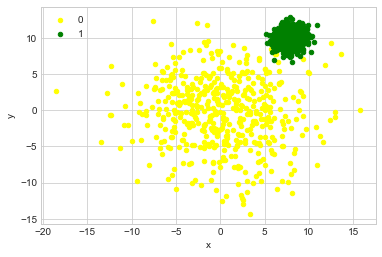

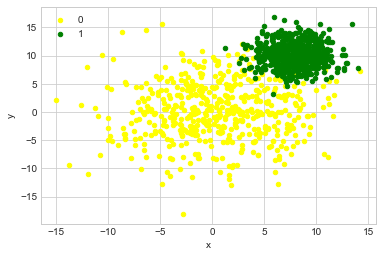

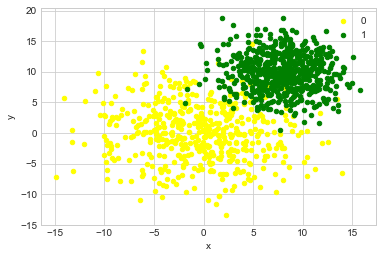

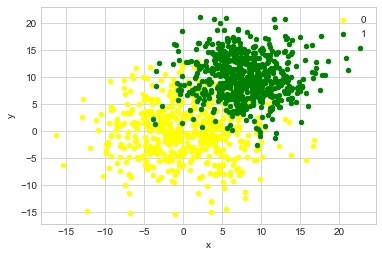

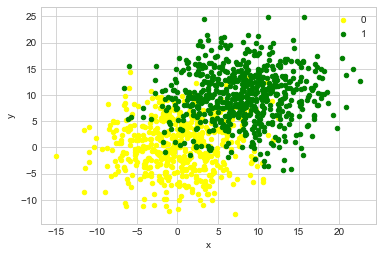

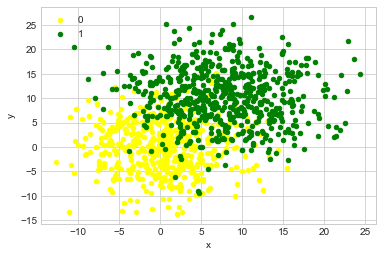

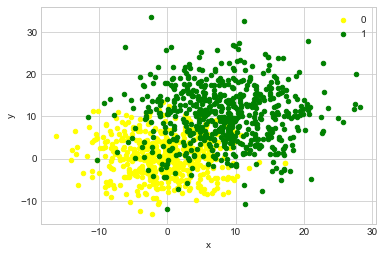

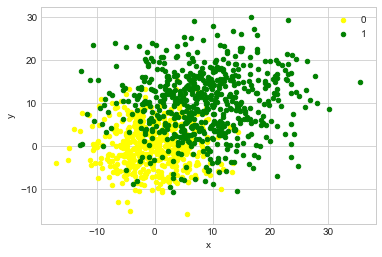

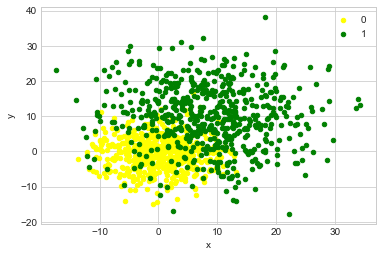

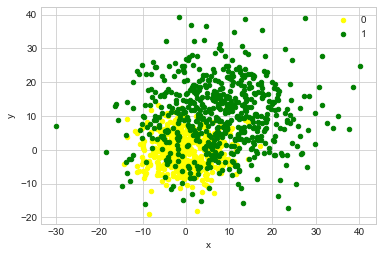

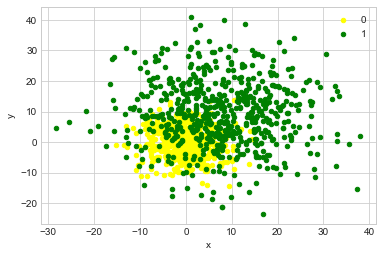

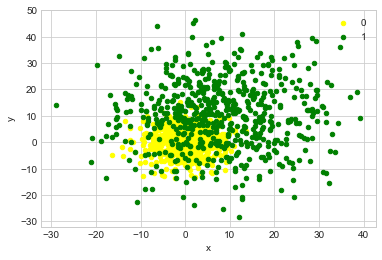

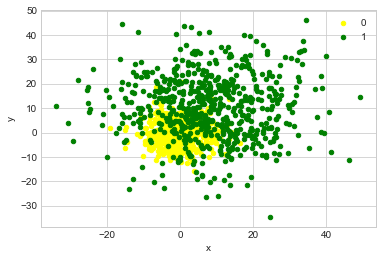

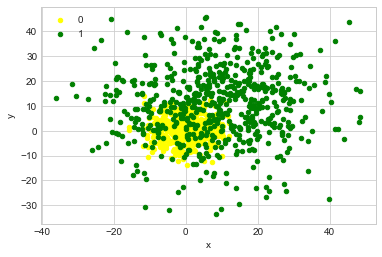

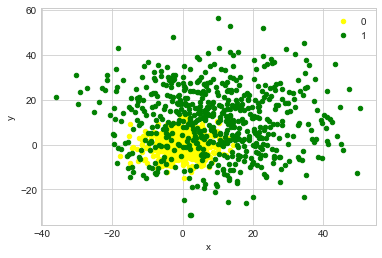

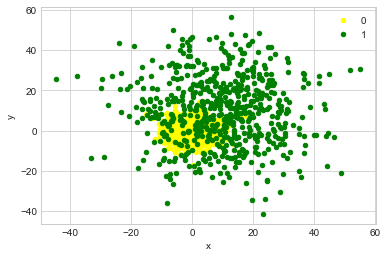

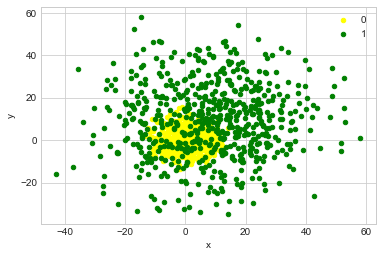

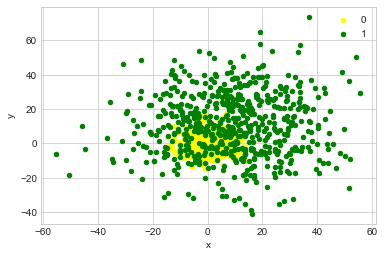

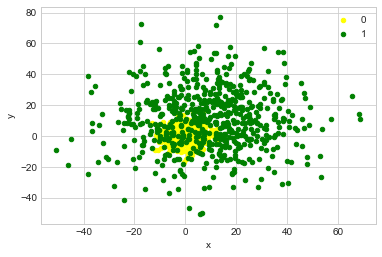

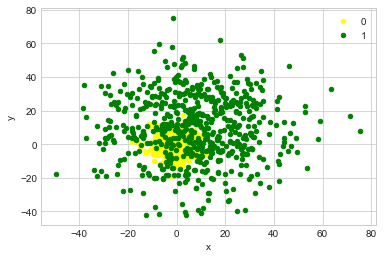

In [69]:
for i in scale:
    features, labels = make_blobs(n_samples = [500,600], n_features = 2, centers = [(0,0), (8,10)],
    cluster_std = [5,i], shuffle = True)
    df = pd.DataFrame(dict(x = features[:,0], y = features[:,1],label = labels))
    colors = {0:'yellow', 1:'green'}
    grouped = df.groupby('label')
    fig, ax = plt.subplots()
    for key, group in grouped: 
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

In [70]:
std_dev = np.arange(1,21)
kmeans_accuracy=[]
gmm_accuracy=[]
hc_accuracy=[]

for i in std_dev:
    features, labels = make_blobs(n_samples = [500,600], n_features = 2, centers = [(0,0), (8,10)],
                                 cluster_std = [5,i], shuffle = True)
    
    features = StandardScaler().fit_transform(features)
    kmeans = KMeans(n_clusters = 2, n_init = 10).fit(features)
    kmeans_accuracy.append(adjusted_rand_score(labels, kmeans.labels_))
    
    gmm = GaussianMixture(n_components = 2, n_init = 10)
    gmm.fit(features)
    preds = gmm.predict(features)
    gmm_accuracy.append(adjusted_rand_score(labels, preds))
    
    hc = AgglomerativeClustering(n_clusters=2,linkage='ward')
    hc_labels = hc.fit_predict(features)
    hc_accuracy.append(adjusted_rand_score(labels, hc_labels))

Text(0, 0.5, 'Accuracy')

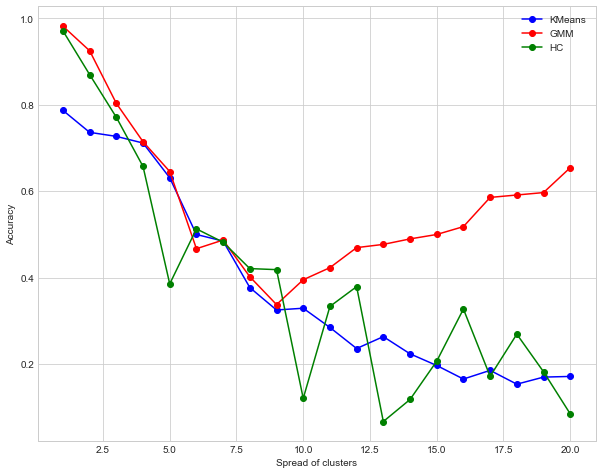

In [71]:
plt.figure(figsize = (10,8))
plt.plot(std_dev, kmeans_accuracy, 'bo-', label = 'KMeans')
plt.plot(std_dev, gmm_accuracy, 'ro-', label = 'GMM')
plt.plot(std_dev, hc_accuracy, 'go-', label = 'HC')
plt.legend()
plt.xlabel('Spread of clusters')
plt.ylabel('Accuracy')

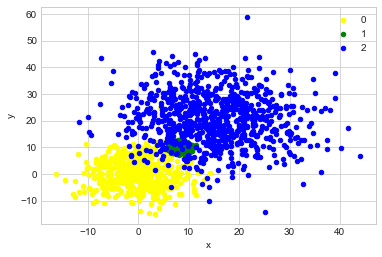

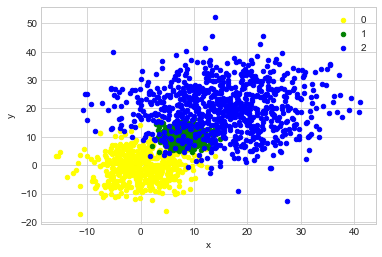

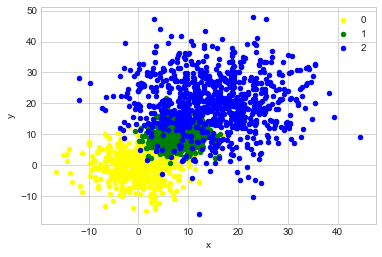

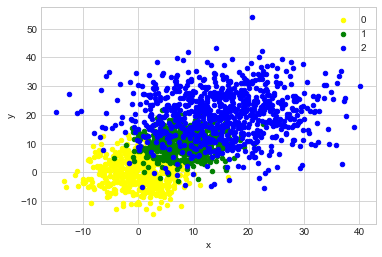

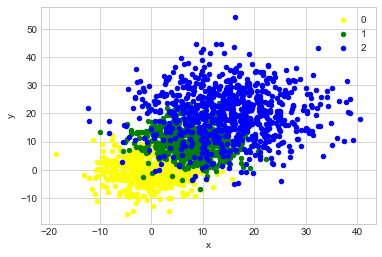

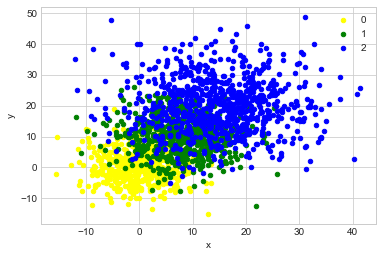

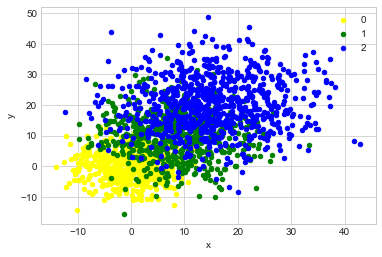

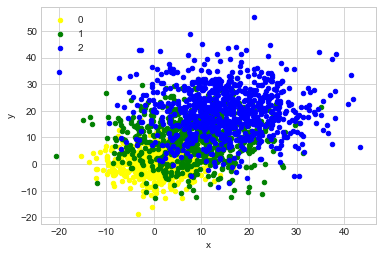

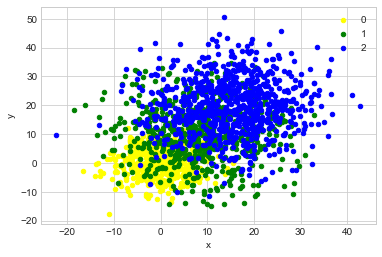

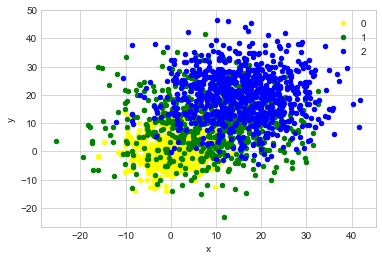

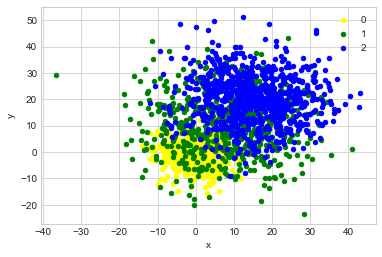

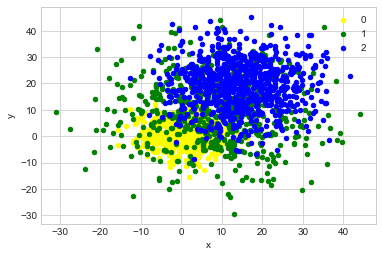

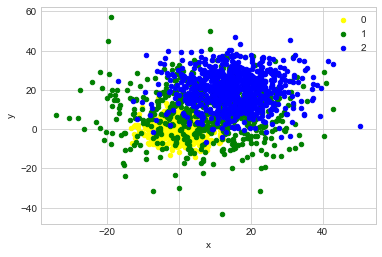

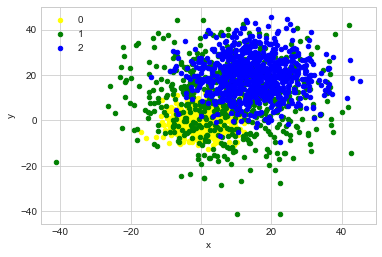

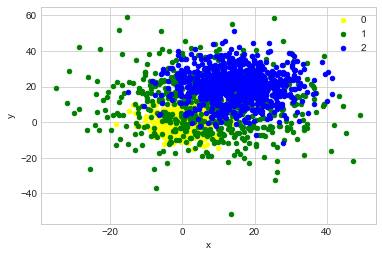

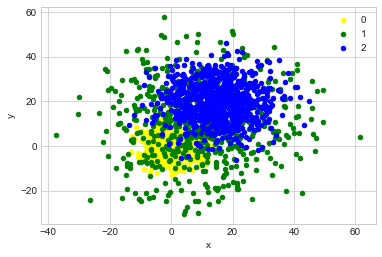

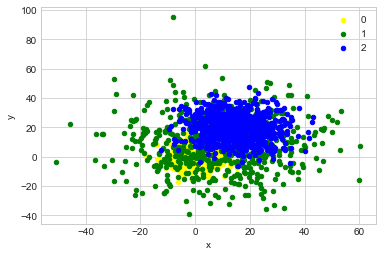

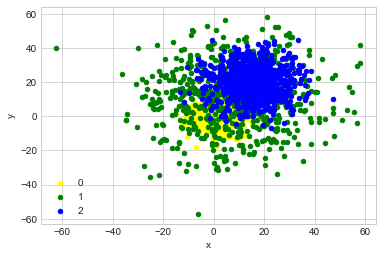

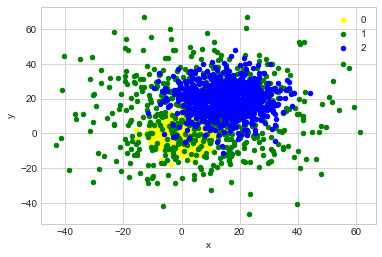

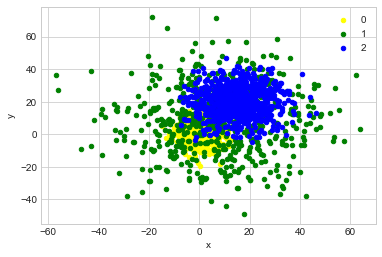

In [72]:
for i in scale:
    features, labels = make_blobs(n_samples = [500,600,800], n_features = 3, centers = [(0,0), (8,10), (15,20)],
    cluster_std = [5,i,9], shuffle = True)
    df = pd.DataFrame(dict(x = features[:,0], y = features[:,1],label = labels))
    colors = {0:'yellow', 1:'green', 2:'blue'}
    grouped = df.groupby('label')
    fig, ax = plt.subplots()
    for key, group in grouped: 
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

In [73]:
std_dev = np.arange(1,21)
kmeans_accuracy2=[]
gmm_accuracy2=[]
hc_accuracy2=[]

for i in std_dev:
    features, labels = make_blobs(n_samples = [500,600,800], n_features = 3, centers = [(0,0), (8,10), (15,20)],
    cluster_std = [5,i,9], shuffle = True)
    
    features = StandardScaler().fit_transform(features)
    kmeans = KMeans(n_clusters = 3, n_init = 10).fit(features)
    kmeans_accuracy2.append(adjusted_rand_score(labels, kmeans.labels_))
    
    gmm = GaussianMixture(n_components = 3, n_init = 10)
    gmm.fit(features)
    preds = gmm.predict(features)
    gmm_accuracy2.append(adjusted_rand_score(labels, preds))
    
    hc = AgglomerativeClustering(n_clusters=3,linkage='ward')
    hc_labels = hc.fit_predict(features)
    hc_accuracy2.append(adjusted_rand_score(labels, hc_labels))

Text(0, 0.5, 'Accuracy')

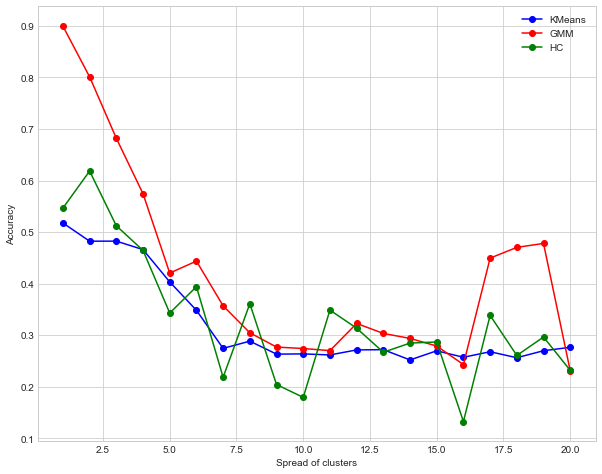

In [74]:
plt.figure(figsize = (10,8))
plt.plot(std_dev, kmeans_accuracy2, 'bo-', label = 'KMeans')
plt.plot(std_dev, gmm_accuracy2, 'ro-', label = 'GMM')
plt.plot(std_dev, hc_accuracy2, 'go-', label = 'HC')
plt.legend()
plt.xlabel('Spread of clusters')
plt.ylabel('Accuracy')

In [75]:
#Finding clusters

df_kmeans = pd.DataFrame()
df_gmm = pd.DataFrame()
df_agg = pd.DataFrame()
std_dev=np.arange(1,21)

for it in std_dev:
  print("Standard dev:",it)
  feat, true_labels = make_blobs(n_samples =[500,700] ,
                  n_features = 2, 
                  centers =[(0,0),(5,15)] ,
                  cluster_std = [5,it],
                  shuffle = True,random_state=43)
  features= StandardScaler().fit_transform(feat)
  max_clusters=5
  max_iterations=100
  wcss_k = np.zeros((max_clusters-1,max_iterations))
  silhouette_coefficients_k = np.zeros((max_clusters-1,max_iterations))
  davies_bouldin_coeficients_k = np.zeros((max_clusters-1,max_iterations))
  print("K means cluster finding for k=2 and on varying std dev:",it)
  
  for ite in range(max_iterations):
    


    for i in range(2,max_clusters+1):

        kmeans = KMeans(n_clusters=i)
        kmeans.fit(features)
        wcss_k[i-2][ite] = kmeans.inertia_
        score_sil = metrics.silhouette_score(features, kmeans.labels_)
        score_db = metrics.davies_bouldin_score(features, kmeans.labels_)
        silhouette_coefficients_k[i-2][ite] = score_sil
        davies_bouldin_coeficients_k[i-2][ite] = score_db

  if(it==1 or it%5==0):
    # print(np.array([np.median(wcss_k,axis=1)-np.min(wcss_k,axis=1),np.max(wcss_k,axis=1)-np.median(wcss_k,axis=1)]))
    df_kmeans = df_kmeans.append({'wcss':np.median(wcss_k,axis=1),'wcss_error':np.array([np.median(wcss_k,axis=1)-np.min(wcss_k,axis=1),np.max(wcss_k,axis=1)-np.median(wcss_k,axis=1)]), 
                                  'silhouette_k' : np.median(silhouette_coefficients_k,axis=1), 'sil_error_k':[np.median(silhouette_coefficients_k,axis=1)-np.min(silhouette_coefficients_k,axis=1),np.max(silhouette_coefficients_k,axis=1)-np.median(silhouette_coefficients_k,axis=1)],
                                  'davies_k' :np.median(davies_bouldin_coeficients_k,axis=1), 'davis_error_k' : [np.median(davies_bouldin_coeficients_k,axis=1)-np.min(davies_bouldin_coeficients_k,axis=1),np.max(davies_bouldin_coeficients_k,axis=1)-np.median(davies_bouldin_coeficients_k,axis=1)] },ignore_index=True)

  #GMM
  print("GMM cluster finding for k=2 and on varying scale of std dev",it)
  max_clusters=5
  max_iterations=100
  silhouette_coefficients_g = np.zeros((max_clusters-1,max_iterations))
  davies_bouldin_coeficients_g = np.zeros((max_clusters-1,max_iterations))
  bic = np.zeros((max_clusters-1,max_iterations))
  
  for ite in range(max_iterations):
    


    for i in range(2,max_clusters+1):

        gm = GaussianMixture(n_components=i)
        gm.fit(features)
        gmm_labels = gm.predict(features)
        bic[i-2] += gm.bic(features)
        score_sil = metrics.silhouette_score(features, gmm_labels)
        score_db = metrics.davies_bouldin_score(features, gmm_labels)
        silhouette_coefficients_g[i-2][ite] = score_sil
        davies_bouldin_coeficients_g[i-2][ite] = score_db
  if(it==1 or it%5==0):
    df_gmm = df_gmm.append({'bic':np.median(bic,axis=1),'BIC_error':np.array([np.median(bic,axis=1)-np.min(bic,axis=1),np.max(bic,axis=1)-np.median(bic,axis=1)]), 
                                  'silhouette_g' : np.median(silhouette_coefficients_g,axis=1), 'sil_error_g':[np.median(silhouette_coefficients_g,axis=1)-np.min(silhouette_coefficients_g,axis=1),np.max(silhouette_coefficients_g,axis=1)-np.median(silhouette_coefficients_g,axis=1)],
                                  'davies_g' :np.median(davies_bouldin_coeficients_g,axis=1), 'davis_error_g' : [np.median(davies_bouldin_coeficients_g,axis=1)-np.min(davies_bouldin_coeficients_g,axis=1),np.max(davies_bouldin_coeficients_g,axis=1)-np.median(davies_bouldin_coeficients_g,axis=1)] },ignore_index=True)

  #finding clusters by agglomerative clustering
  print("Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev",it)
  max_clusters=5
  silhouette_coefficients_a = []
  davies_bouldin_coeficients_a = []
  calinski= []

  for cl in range(2,max_clusters+1):
    Agg = AgglomerativeClustering(n_clusters=cl,linkage='ward',)
    label_a=Agg.fit_predict(features)
    silhouette_avg = metrics.silhouette_score(features, label_a)
    silhouette_coefficients_a.append(silhouette_avg)

    score = metrics.davies_bouldin_score(features, label_a)
    davies_bouldin_coeficients_a.append(score)
    cal=metrics.calinski_harabasz_score(features,Agg.labels_)
    calinski.append(cal)

  if(it==1 or it%5==0):
    df_agg = df_agg.append({'calinski':calinski, 
                                  'silhouette_a' : silhouette_coefficients_a,
                                  'davies_a' :davies_bouldin_coeficients_a },ignore_index=True)

Standard dev: 1
K means cluster finding for k=2 and on varying std dev: 1
GMM cluster finding for k=2 and on varying scale of std dev 1
Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev 1
Standard dev: 2
K means cluster finding for k=2 and on varying std dev: 2
GMM cluster finding for k=2 and on varying scale of std dev 2
Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev 2
Standard dev: 3
K means cluster finding for k=2 and on varying std dev: 3
GMM cluster finding for k=2 and on varying scale of std dev 3
Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev 3
Standard dev: 4
K means cluster finding for k=2 and on varying std dev: 4
GMM cluster finding for k=2 and on varying scale of std dev 4
Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev 4
Standard dev: 5
K means cluster finding for k=2 and on varying std dev: 5
GMM cluster finding for k=2 and on var

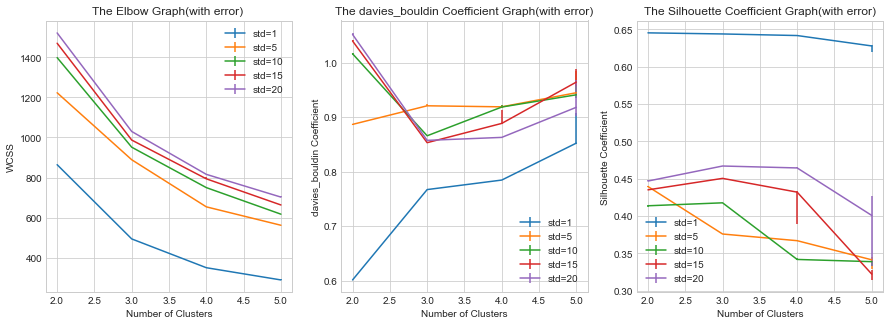

In [76]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][0], df_kmeans['wcss_error'][0], label='std=1')
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][1], df_kmeans['wcss_error'][1], label='std=5')
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][2], df_kmeans['wcss_error'][2], label='std=10')
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][3], df_kmeans['wcss_error'][3], label='std=15')
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][4], df_kmeans['wcss_error'][4], label='std=20')
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("WCSS")
ax[0].set_title('The Elbow Graph(with error) ')
ax[0].legend()

ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][0], df_kmeans['davis_error_k'][0], label = 'std=1')
ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][1], df_kmeans['davis_error_k'][1], label='std=5')
ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][2], df_kmeans['davis_error_k'][2], label='std=10')
ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][3], df_kmeans['davis_error_k'][3], label='std=15')
ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][4], df_kmeans['davis_error_k'][4], label='std=20')
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("davies_bouldin Coefficient")
ax[1].set_title('The davies_bouldin Coefficient Graph(with error)')
ax[1].legend()

ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][0], df_kmeans['sil_error_k'][0], label='std=1')
ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][1], df_kmeans['sil_error_k'][1], label='std=5')
ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][2], df_kmeans['sil_error_k'][2], label='std=10')
ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][3], df_kmeans['sil_error_k'][3], label='std=15')
ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][4], df_kmeans['sil_error_k'][4], label='std=20')
ax[2].set_xlabel("Number of Clusters")
ax[2].set_ylabel("Silhouette Coefficient")
ax[2].set_title('The Silhouette Coefficient Graph(with error)')
ax[2].legend()


plt.show()

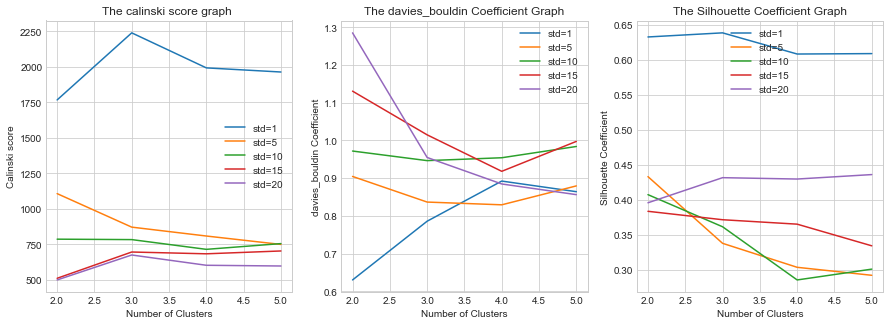

In [77]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][0], label='std=1')
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][1], label='std=5')
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][2], label='std=10')
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][3], label='std=15')
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][4], label='std=20')
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("Calinski score")
ax[0].set_title('The calinski score graph ')
ax[0].legend()

ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][0],  label = 'std=1')
ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][1],  label='std=5')
ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][2],  label='std=10')
ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][3],  label='std=15')
ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][4],  label='std=20')
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("davies_bouldin Coefficient")
ax[1].set_title('The davies_bouldin Coefficient Graph')
ax[1].legend()

ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][0],  label='std=1')
ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][1], label='std=5')
ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][2], label='std=10')
ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][3], label='std=15')
ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][4], label='std=20')
ax[2].set_xlabel("Number of Clusters")
ax[2].set_ylabel("Silhouette Coefficient")
ax[2].set_title('The Silhouette Coefficient Graph')
ax[2].legend()


plt.show()

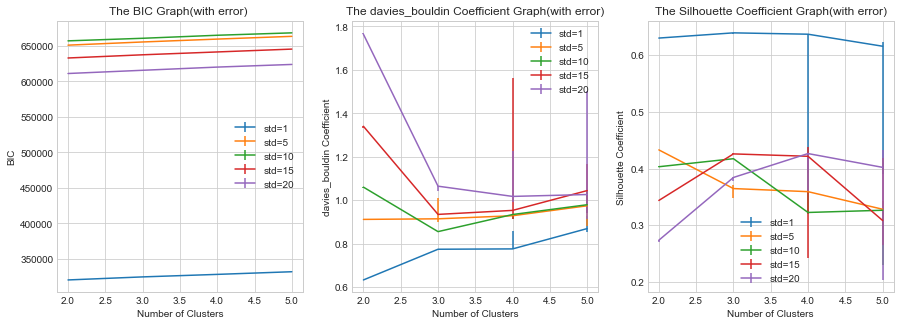

In [78]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][0], df_gmm['BIC_error'][0], label='std=1')
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][1], df_gmm['BIC_error'][1], label='std=5')
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][2], df_gmm['BIC_error'][2], label='std=10')
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][3], df_gmm['BIC_error'][3], label='std=15')
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][4], df_gmm['BIC_error'][4], label='std=20')
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("BIC")
ax[0].set_title('The BIC Graph(with error) ')
ax[0].legend()

ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][0], df_gmm['davis_error_g'][0], label = 'std=1')
ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][1], df_gmm['davis_error_g'][1], label='std=5')
ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][2], df_gmm['davis_error_g'][2], label='std=10')
ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][3], df_gmm['davis_error_g'][3], label='std=15')
ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][4], df_gmm['davis_error_g'][4], label='std=20')
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("davies_bouldin Coefficient")
ax[1].set_title('The davies_bouldin Coefficient Graph(with error)')
ax[1].legend()

ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][0], df_gmm['sil_error_g'][0], label='std=1')
ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][1], df_gmm['sil_error_g'][1], label='std=5')
ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][2], df_gmm['sil_error_g'][2], label='std=10')
ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][3], df_gmm['sil_error_g'][3], label='std=15')
ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][4], df_gmm['sil_error_g'][4], label='std=20')
ax[2].set_xlabel("Number of Clusters")
ax[2].set_ylabel("Silhouette Coefficient")
ax[2].set_title('The Silhouette Coefficient Graph(with error)')
ax[2].legend()



In [79]:
random_value_x = np.random.uniform(-100, 100, size=200)
random_value_y = np.random.uniform(-100, 100, size=200)

In [81]:
np.random.uniform(
      -100,
      100,
      size = (1100, 20)
  ).shape

(1100, 20)

In [82]:
def simulate_data_K2(
    features,
    samples,
    sd,
    non_informative_features = 0,
    center = 3
):
  inform_features = features - non_informative_features 
  assert inform_features >= 1, 'informative features should be >= 1'

  # Add informative features
  features, true_labels = make_blobs(
      n_samples = samples,
      n_features = inform_features, 
      centers = [np.zeros(inform_features), center * np.ones(inform_features)],
      cluster_std = sd,
      shuffle = True,
      random_state = 43
  )

  # Add non informative features
  sd_max = np.array(sd).flatten().max()
  sd_min = np.array(sd).flatten().min()

  total_samples = sum(samples)
  maxi = center
  mini = 0

  random_value_x = np.random.uniform(
      mini - sd_min,
      maxi + sd_max,
      size = (total_samples, non_informative_features)
  )
  
  features = np.c_[features, random_value_x]
  return features, true_labels

In [83]:
std_dev=np.arange(1,50)
kmeans_accuracy=[]
gmm_accuracy=[]
aggl_accuracy=[]

for i in std_dev:
  features, true_labels = simulate_data_K2(features = 150,
                non_informative_features = 20,
                samples = [500,700],
                sd = [5, i])
 
  x = StandardScaler().fit_transform(features)
  kmeans=KMeans(n_clusters=2, random_state=0,n_init=10).fit(x)
  kmeans_accuracy.append(adjusted_rand_score(true_labels,kmeans.labels_))
  gm=GaussianMixture(n_components=2,n_init=10)
  gm.fit(x)
  gm_labels = gm.predict(x)
  gmm_accuracy.append(adjusted_rand_score(true_labels,gm_labels))
  aggl=AgglomerativeClustering(n_clusters=2,linkage='ward')
  aggl_labels = aggl.fit_predict(x)
  aggl_accuracy.append(adjusted_rand_score(true_labels,aggl_labels))

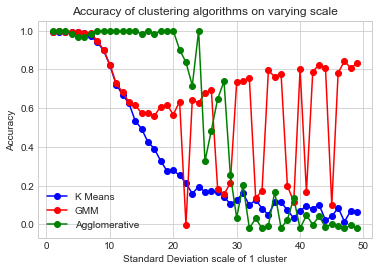

In [84]:
plt.plot(std_dev,(kmeans_accuracy),'bo-',label="K Means")
plt.plot(std_dev,(gmm_accuracy),'ro-',label="GMM")
plt.plot(std_dev,(aggl_accuracy),'go-',label="Agglomerative")
plt.title("Accuracy of clustering algorithms on varying scale")
plt.xlabel("Standard Deviation scale of 1 cluster")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Standard dev: 1
K means cluster finding for k=2 and on varying std dev: 1
GMM cluster finding for k=2 and on varying scale of std dev 1
Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev 1
Standard dev: 2
K means cluster finding for k=2 and on varying std dev: 2
GMM cluster finding for k=2 and on varying scale of std dev 2
Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev 2
Standard dev: 3
K means cluster finding for k=2 and on varying std dev: 3
GMM cluster finding for k=2 and on varying scale of std dev 3
Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev 3
Standard dev: 4
K means cluster finding for k=2 and on varying std dev: 4
GMM cluster finding for k=2 and on varying scale of std dev 4
Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev 4
Standard dev: 5
K means cluster finding for k=2 and on varying std dev: 5
GMM cluster finding for k=2 and on var

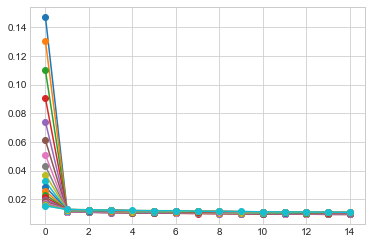

In [88]:
#Finding clusters
df_kmeans = pd.DataFrame()
df_gmm = pd.DataFrame()
df_agg = pd.DataFrame()
std_dev=np.arange(1,21)
for it in std_dev:
  print("Standard dev:",it)
  feat, true_labels = simulate_data_K2(features = 150,
                non_informative_features = 20,
                samples = [500,700],
                sd = [5, it])
  x= StandardScaler().fit_transform(feat)
  pca = PCA()
  principalComponents = pca.fit_transform(x)
  PCA_a = np.array(principalComponents)
  explained_variance = pca.explained_variance_ratio_
  plt.plot(explained_variance[:15], 'o-')
  features = PCA_a[np.arange(10)]
  max_clusters=5
  max_iterations=100
  wcss_k = np.zeros((max_clusters-1,max_iterations))
  silhouette_coefficients_k = np.zeros((max_clusters-1,max_iterations))
  davies_bouldin_coeficients_k = np.zeros((max_clusters-1,max_iterations))
  print("K means cluster finding for k=2 and on varying std dev:",it)
  
  for ite in range(max_iterations):
    


    for i in range(2,max_clusters+1):

        kmeans = KMeans(n_clusters=i)
        kmeans.fit(features)
        wcss_k[i-2][ite] = kmeans.inertia_
        score_sil = metrics.silhouette_score(features, kmeans.labels_)
        score_db = metrics.davies_bouldin_score(features, kmeans.labels_)
        silhouette_coefficients_k[i-2][ite] = score_sil
        davies_bouldin_coeficients_k[i-2][ite] = score_db

  if(it==1 or it%5==0):
    # print(np.array([np.median(wcss_k,axis=1)-np.min(wcss_k,axis=1),np.max(wcss_k,axis=1)-np.median(wcss_k,axis=1)]))
    df_kmeans = df_kmeans.append({'wcss':np.median(wcss_k,axis=1),'wcss_error':np.array([np.median(wcss_k,axis=1)-np.min(wcss_k,axis=1),np.max(wcss_k,axis=1)-np.median(wcss_k,axis=1)]), 
                                  'silhouette_k' : np.median(silhouette_coefficients_k,axis=1), 'sil_error_k':[np.median(silhouette_coefficients_k,axis=1)-np.min(silhouette_coefficients_k,axis=1),np.max(silhouette_coefficients_k,axis=1)-np.median(silhouette_coefficients_k,axis=1)],
                                  'davies_k' :np.median(davies_bouldin_coeficients_k,axis=1), 'davis_error_k' : [np.median(davies_bouldin_coeficients_k,axis=1)-np.min(davies_bouldin_coeficients_k,axis=1),np.max(davies_bouldin_coeficients_k,axis=1)-np.median(davies_bouldin_coeficients_k,axis=1)] },ignore_index=True)

  #GMM
  print("GMM cluster finding for k=2 and on varying scale of std dev",it)
  max_clusters=5
  max_iterations=100
  silhouette_coefficients_g = np.zeros((max_clusters-1,max_iterations))
  davies_bouldin_coeficients_g = np.zeros((max_clusters-1,max_iterations))
  bic = np.zeros((max_clusters-1,max_iterations))
  
  for ite in range(max_iterations):
    


    for i in range(2,max_clusters+1):

        gm = GaussianMixture(n_components=i)
        gm.fit(features)
        gmm_labels = gm.predict(features)
        bic[i-2] += gm.bic(features)
        score_sil = metrics.silhouette_score(features, gmm_labels)
        score_db = metrics.davies_bouldin_score(features, gmm_labels)
        silhouette_coefficients_g[i-2][ite] = score_sil
        davies_bouldin_coeficients_g[i-2][ite] = score_db
  if(it==1 or it%5==0):
    df_gmm = df_gmm.append({'bic':np.median(bic,axis=1),'BIC_error':np.array([np.median(bic,axis=1)-np.min(bic,axis=1),np.max(bic,axis=1)-np.median(bic,axis=1)]), 
                                  'silhouette_g' : np.median(silhouette_coefficients_g,axis=1), 'sil_error_g':[np.median(silhouette_coefficients_g,axis=1)-np.min(silhouette_coefficients_g,axis=1),np.max(silhouette_coefficients_g,axis=1)-np.median(silhouette_coefficients_g,axis=1)],
                                  'davies_g' :np.median(davies_bouldin_coeficients_g,axis=1), 'davis_error_g' : [np.median(davies_bouldin_coeficients_g,axis=1)-np.min(davies_bouldin_coeficients_g,axis=1),np.max(davies_bouldin_coeficients_g,axis=1)-np.median(davies_bouldin_coeficients_g,axis=1)] },ignore_index=True)

  #finding clusters by agglomerative clustering
  print("Agglomerative(Ward Linkage) cluster finding for k=2 and on varying scale of std dev",it)
  max_clusters=5
  silhouette_coefficients_a = []
  davies_bouldin_coeficients_a = []
  calinski= []

  for cl in range(2,max_clusters+1):
    Agg = AgglomerativeClustering(n_clusters=cl,linkage='ward',)
    label_a=Agg.fit_predict(features)
    silhouette_avg = metrics.silhouette_score(features, label_a)
    silhouette_coefficients_a.append(silhouette_avg)

    score = metrics.davies_bouldin_score(features, label_a)
    davies_bouldin_coeficients_a.append(score)
    cal=metrics.calinski_harabasz_score(features,Agg.labels_)
    calinski.append(cal)

  if(it==1 or it%5==0):
    df_agg = df_agg.append({'calinski':calinski, 
                                  'silhouette_a' : silhouette_coefficients_a,
                                  'davies_a' :davies_bouldin_coeficients_a },ignore_index=True)

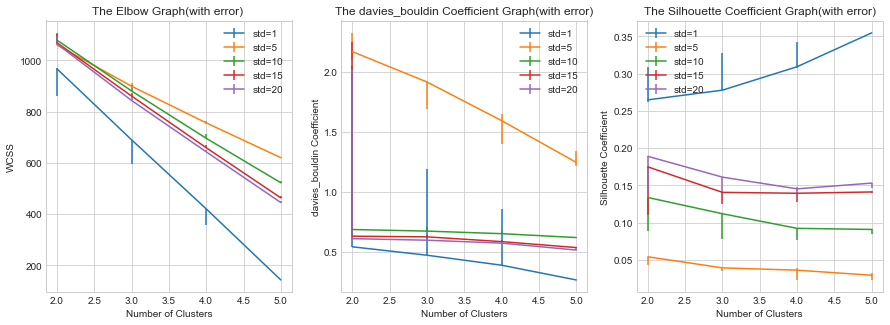

In [89]:
#K Means Plot
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][0], df_kmeans['wcss_error'][0], label='std=1')
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][1], df_kmeans['wcss_error'][1], label='std=5')
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][2], df_kmeans['wcss_error'][2], label='std=10')
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][3], df_kmeans['wcss_error'][3], label='std=15')
ax[0].errorbar(range(2, max_clusters+1), df_kmeans['wcss'][4], df_kmeans['wcss_error'][4], label='std=20')
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("WCSS")
ax[0].set_title('The Elbow Graph(with error) ')
ax[0].legend()

ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][0], df_kmeans['davis_error_k'][0], label = 'std=1')
ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][1], df_kmeans['davis_error_k'][1], label='std=5')
ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][2], df_kmeans['davis_error_k'][2], label='std=10')
ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][3], df_kmeans['davis_error_k'][3], label='std=15')
ax[1].errorbar(range(2, max_clusters+1), df_kmeans['davies_k'][4], df_kmeans['davis_error_k'][4], label='std=20')
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("davies_bouldin Coefficient")
ax[1].set_title('The davies_bouldin Coefficient Graph(with error)')
ax[1].legend()

ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][0], df_kmeans['sil_error_k'][0], label='std=1')
ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][1], df_kmeans['sil_error_k'][1], label='std=5')
ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][2], df_kmeans['sil_error_k'][2], label='std=10')
ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][3], df_kmeans['sil_error_k'][3], label='std=15')
ax[2].errorbar(range(2, max_clusters+1), df_kmeans['silhouette_k'][4], df_kmeans['sil_error_k'][4], label='std=20')
ax[2].set_xlabel("Number of Clusters")
ax[2].set_ylabel("Silhouette Coefficient")
ax[2].set_title('The Silhouette Coefficient Graph(with error)')
ax[2].legend()


plt.show()

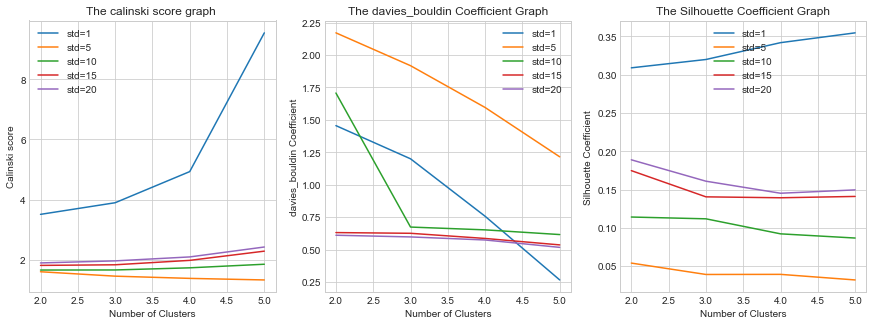

In [90]:
#Agglomerative plot
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][0], label='std=1')
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][1], label='std=5')
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][2], label='std=10')
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][3], label='std=15')
ax[0].errorbar(range(2, max_clusters+1), df_agg['calinski'][4], label='std=20')
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("Calinski score")
ax[0].set_title('The calinski score graph ')
ax[0].legend()

ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][0],  label = 'std=1')
ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][1],  label='std=5')
ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][2],  label='std=10')
ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][3],  label='std=15')
ax[1].errorbar(range(2, max_clusters+1), df_agg['davies_a'][4],  label='std=20')
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("davies_bouldin Coefficient")
ax[1].set_title('The davies_bouldin Coefficient Graph')
ax[1].legend()

ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][0],  label='std=1')
ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][1], label='std=5')
ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][2], label='std=10')
ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][3], label='std=15')
ax[2].errorbar(range(2, max_clusters+1), df_agg['silhouette_a'][4], label='std=20')
ax[2].set_xlabel("Number of Clusters")
ax[2].set_ylabel("Silhouette Coefficient")
ax[2].set_title('The Silhouette Coefficient Graph')
ax[2].legend()

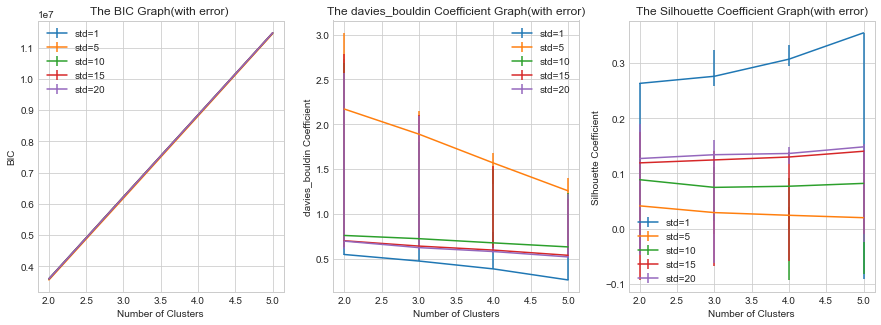

In [91]:
#GMM Plot
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][0], df_gmm['BIC_error'][0], label='std=1')
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][1], df_gmm['BIC_error'][1], label='std=5')
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][2], df_gmm['BIC_error'][2], label='std=10')
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][3], df_gmm['BIC_error'][3], label='std=15')
ax[0].errorbar(range(2, max_clusters+1), df_gmm['bic'][4], df_gmm['BIC_error'][4], label='std=20')
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("BIC")
ax[0].set_title('The BIC Graph(with error) ')
ax[0].legend()

ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][0], df_gmm['davis_error_g'][0], label = 'std=1')
ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][1], df_gmm['davis_error_g'][1], label='std=5')
ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][2], df_gmm['davis_error_g'][2], label='std=10')
ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][3], df_gmm['davis_error_g'][3], label='std=15')
ax[1].errorbar(range(2, max_clusters+1), df_gmm['davies_g'][4], df_gmm['davis_error_g'][4], label='std=20')
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("davies_bouldin Coefficient")
ax[1].set_title('The davies_bouldin Coefficient Graph(with error)')
ax[1].legend()

ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][0], df_gmm['sil_error_g'][0], label='std=1')
ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][1], df_gmm['sil_error_g'][1], label='std=5')
ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][2], df_gmm['sil_error_g'][2], label='std=10')
ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][3], df_gmm['sil_error_g'][3], label='std=15')
ax[2].errorbar(range(2, max_clusters+1), df_gmm['silhouette_g'][4], df_gmm['sil_error_g'][4], label='std=20')
ax[2].set_xlabel("Number of Clusters")
ax[2].set_ylabel("Silhouette Coefficient")
ax[2].set_title('The Silhouette Coefficient Graph(with error)')
ax[2].legend()


plt.show()

In [92]:
def generate_data(N=500, plot_true = False, print_true = False, return_true = True):
    N= N
    x = [4,4] + np.random.randn(N, 2)@[[5,1],[1,2]]
    # x1 = [10,10]+ np.random.randn(int(N/3), 2)@[[1,0.7],[0.7,6]]
    y = [5,25] + np.random.randn(N, 2)@[[4,0],[0,9]]


    # N2 = int(N/2)
    # x = [4,4] + np.random.randn(N, 2)*2
    # x1 = [2,10]+ np.random.randn(N2, 2)*2 
    # y = [12,9] + np.random.randn(N, 2)*3

    data_QDA_0 = pd.DataFrame({'x' : y[:,0],
                            'y' : y[:,1],
                            'label':0})
    data_QDA_1 = pd.DataFrame({'x' : list(x[:,0]),
                            'y' : list(x[:,1]),
                            'label' : 1})
    data_QDA = data_QDA_0.append(data_QDA_1, ignore_index = True)
    data_QDA = data_QDA.sample(frac=1)
    if(print_true):
        print(data_QDA)
    if(plot_true):
        plt.plot(data_QDA_1['x'], data_QDA_1['y'], 'b.',label="1")
        plt.plot(data_QDA_0['x'],data_QDA_0['y'],'r.',label="0")
        plt.legend()
        plt.show()
    if(return_true):
        return data_QDA

In [93]:


features, true_labels = make_moons(n_samples=500, shuffle=True, noise=.3, random_state=43)

kmeans=KMeans(n_clusters=2, random_state=0,n_init=10).fit(features)
kmeans_accuracy.append(adjusted_rand_score(true_labels,kmeans.labels_))
gm=GaussianMixture(n_components=2,n_init=10)
gm.fit(features)
gm_labels = gm.predict(features)
gmm_accuracy.append(adjusted_rand_score(true_labels,gm_labels))
aggl=AgglomerativeClustering(n_clusters=2,linkage='ward')
aggl_labels = aggl.fit_predict(features)
aggl_accuracy.append(adjusted_rand_score(true_labels,aggl_labels))

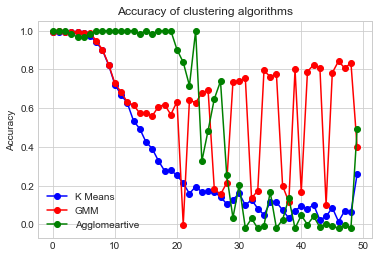

In [94]:
plt.plot((kmeans_accuracy),'bo-',label="K Means")
plt.plot((gmm_accuracy),'ro-',label="GMM")
plt.plot((aggl_accuracy),'go-',label="Agglomeartive")
plt.title("Accuracy of clustering algorithms")
plt.xlabel("")
plt.ylabel("Accuracy")
plt.legend()
plt.show()